In [12]:
 #Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#PARTE 1: Carregar a base de dados wine
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [3]:
#PARTE 2: Implementação do KNN com diferentes métricas e valores de K
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = self.calculate_distances(test_point)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)

    def calculate_distances(self, test_point):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(self.X_train - test_point, axis=1)
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(self.X_train - test_point), axis=1)
        elif self.distance_metric == 'chebyshev':
            return np.max(np.abs(self.X_train - test_point), axis=1)
        else:
            raise ValueError("Métrica de distância não suportada.")

In [4]:
# Testando o KNN com diferentes métricas e valores de K
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan', 'chebyshev']
train_sizes = [0.1, 0.2, 0.3, 0.4]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    for metric in metrics:
        for k in k_values:
            knn_model = KNN(k=k, distance_metric=metric)
            knn_model.fit(X_train, y_train)
            predictions = knn_model.predict(X_test)

            # Calculando métricas de desempenho
            accuracy = accuracy_score(y_test, predictions)
            f1 = f1_score(y_test, predictions, average='weighted')
            confusion_mat = confusion_matrix(y_test, predictions)

            print(f"KNN - Treino: {train_size*100}%, Métrica: {metric}, K={k}")
            print(f"Acurácia: {accuracy:.4f}, F1-score: {f1:.4f}")
            print(f"Matriz de Confusão:\n{confusion_mat}\n")

KNN - Treino: 10.0%, Métrica: euclidean, K=1
Acurácia: 0.6460, F1-score: 0.6455
Matriz de Confusão:
[[41 14  1]
 [ 5 41 15]
 [ 7 15 22]]

KNN - Treino: 10.0%, Métrica: euclidean, K=3
Acurácia: 0.6832, F1-score: 0.6634
Matriz de Confusão:
[[56  0  0]
 [11 37 13]
 [17 10 17]]

KNN - Treino: 10.0%, Métrica: euclidean, K=5
Acurácia: 0.6832, F1-score: 0.6847
Matriz de Confusão:
[[48  7  1]
 [ 2 42 17]
 [ 1 23 20]]

KNN - Treino: 10.0%, Métrica: euclidean, K=7
Acurácia: 0.5839, F1-score: 0.5402
Matriz de Confusão:
[[34  8 14]
 [ 0 58  3]
 [ 0 42  2]]

KNN - Treino: 10.0%, Métrica: euclidean, K=9
Acurácia: 0.6211, F1-score: 0.5382
Matriz de Confusão:
[[39 17  0]
 [ 0 61  0]
 [ 0 44  0]]

KNN - Treino: 10.0%, Métrica: manhattan, K=1
Acurácia: 0.6708, F1-score: 0.6704
Matriz de Confusão:
[[41 14  1]
 [ 5 43 13]
 [ 7 13 24]]

KNN - Treino: 10.0%, Métrica: manhattan, K=3
Acurácia: 0.7205, F1-score: 0.7101
Matriz de Confusão:
[[55  0  1]
 [ 9 37 15]
 [10 10 24]]

KNN - Treino: 10.0%, Métrica: manh

In [5]:
#PARTE 3: Classificador Bayes Completo
class GaussianClass:
    def __init__(self):
        self.class_stats = {}

    def fit(self, X_train, y_train):
        for class_label in np.unique(y_train):
            class_data = X_train[y_train == class_label]
            mean = np.mean(class_data, axis=0)
            covariance = np.cov(class_data.T)  # Transpondo para calcular a covariância corretamente
            self.class_stats[class_label] = (mean, covariance)

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            probabilities = []
            for class_label, (mean, covariance) in self.class_stats.items():
                prob = multivariate_normal.pdf(test_point, mean=mean, cov=covariance)
                probabilities.append(prob)
            predicted_class = np.argmax(probabilities)
            predictions.append(predicted_class)
        return np.array(predictions)

In [6]:
# Testando o Classificador Bayes Completo
gaussian_model = GaussianClass()
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, train_size=0.8, random_state=42)
gaussian_model.fit(X_train_full, y_train_full)
gaussian_predictions = gaussian_model.predict(X_test_full)

# Calculando métricas de desempenho para o classificador Bayes Completo
accuracy_bayes = accuracy_score(y_test_full, gaussian_predictions)
f1_bayes = f1_score(y_test_full, gaussian_predictions, average='weighted')
confusion_mat_bayes = confusion_matrix(y_test_full, gaussian_predictions)

print("Classificador Bayes Completo")
print(f"Acurácia: {accuracy_bayes:.4f}, F1-score: {f1_bayes:.4f}")
print(f"Matriz de Confusão:\n{confusion_mat_bayes}\n")

Classificador Bayes Completo
Acurácia: 1.0000, F1-score: 1.0000
Matriz de Confusão:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]



In [7]:
#PARTE 4: Implementação do Naïve Bayes
class NaiveBayes:
    def __init__(self):
        self.class_stats = {}
        self.class_priors = {}

    def fit(self, X_train, y_train):
        for class_label in np.unique(y_train):
            class_data = X_train[y_train == class_label]
            mean = np.mean(class_data, axis=0)
            std_dev = np.std(class_data, axis=0)
            self.class_stats[class_label] = (mean, std_dev)
            self.class_priors[class_label] = len(class_data) / len(X_train)

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            probabilities = []
            for class_label in self.class_stats.keys():
                mean, std_dev = self.class_stats[class_label]
                prob = self.calculate_class_probability(test_point, mean, std_dev) * self.class_priors[class_label]
                probabilities.append(prob)
            predicted_class = np.argmax(probabilities)
            predictions.append(predicted_class)
        return np.array(predictions)

    def calculate_class_probability(self, test_point, mean, std_dev):
        exponent = np.exp(-((test_point - mean) ** 2) / (2 * (std_dev ** 2)))
        return (1 / (std_dev * np.sqrt(2 * np.pi))) * exponent

In [8]:
# Testando o Naïve Bayes
naive_bayes_model = NaiveBayes()
naive_bayes_model.fit(X_train_full, y_train_full)
naive_bayes_predictions = naive_bayes_model.predict(X_test_full)

# Calculando métricas de desempenho para o Naïve Bayes
accuracy_nb = accuracy_score(y_test_full, naive_bayes_predictions)
f1_nb = f1_score(y_test_full, naive_bayes_predictions, average='weighted')
confusion_mat_nb = confusion_matrix(y_test_full, naive_bayes_predictions)

print("Naïve Bayes")
print(f"Acurácia: {accuracy_nb:.4f}, F1-score: {f1_nb:.4f}")
print(f"Matriz de Confusão:\n{confusion_mat_nb}\n")

Naïve Bayes
Acurácia: 0.0000, F1-score: 0.0000
Matriz de Confusão:
[[0 0 0 9 4 0 1 0]
 [0 0 0 5 1 7 1 0]
 [0 0 0 2 0 4 0 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]



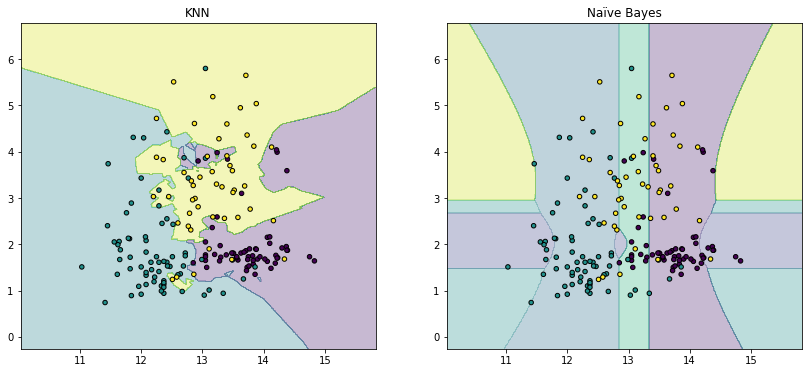

In [14]:
# PARTE 5: Visualização das Regiões de Decisão
def plot_decision_regions(X_train, y_train, model_classifiers):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min , x_max , 0.01),
                         np.arange(y_min , y_max , 0.01))

    plt.figure(figsize=(14 ,6))
    
    for i ,(model , title) in enumerate(model_classifiers):
        model.fit(X_train, y_train)  # Ajusta o modelo antes de prever
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(1 , len(model_classifiers), i + 1)
        plt.contourf(xx , yy , Z , alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y , edgecolor='k', s=20)
        
        plt.title(title)

# Definindo os modelos para visualização
model_classifiers=[
    (KNN(k=3), 'KNN'),
    (NaiveBayes(), 'Naïve Bayes'),
]

# Usando apenas os dois primeiros atributos para visualização.
plot_decision_regions(X[:, :2], y , model_classifiers) 
plt.show()